<a href="https://colab.research.google.com/github/claree007/Housing-Prices/blob/master/NSynth_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>California Housing Prices</h1>

This is a regression problem which I have tackled using different ML models and here I compare their training time and accuracy. I have used Scikit-Learn and TensorFlow.




In [0]:
import os
import time
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.base import BaseEstimator, TransformerMixin

<h2>Loading the dataset</h2>

The dataset is already split into train and test set but it is the ratio 1:1. So I combine the 2 sets and then divide the whole set into train and test sets in the ratio 80 : 20 and then split the training set to make validation set in the ratio 20 : 80. The dataset is already clean and ready to train.

In [0]:
HOUSING_PATH = "sample_data"

def load_housing_data(file_name, housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, file_name)
    return pd.read_csv(csv_path)


housing_set1 = load_housing_data(file_name="california_housing_train.csv")
housing_set2 = load_housing_data(file_name="california_housing_test.csv")

housing = pd.concat([housing_set1, housing_set2], axis=0, ignore_index=True)

housing_X = housing.drop("median_house_value", axis=1)
housing_y = housing["median_house_value"].copy()

X_train_whole, X_test, y_train_whole, y_test = train_test_split(housing_X, housing_y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_whole, y_train_whole, test_size=0.2)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

housing.head()

Some visualizations of the dataset.

In [0]:
#housing.hist(bins=50, figsize=(20, 15))
#plt.show()

correlation = housing.corr()
correlation["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.689109
total_rooms           0.135298
housing_median_age    0.104470
households            0.066573
total_bedrooms        0.051111
population           -0.024234
longitude            -0.045788
latitude             -0.143969
Name: median_house_value, dtype: float64

<h2>Training</h2>

For each model, the best hyperparameters will searched and used. The accuracy of each model during training is testd against a validation set.

In [0]:
def rmse_error(y_train, y_train_predict, y_val, y_val_predict):
    train_error = []
    val_error = []
    '''
    for i in range(len(y_train)):
        train_error.append(mean_squared_error(y_train.iloc[:i+1], y_train_predict[:i+1]))
    for i in range(len(y_val)):
        val_error.append(mean_squared_error(y_val.iloc[:i+1], y_val_predict[:i+1]))
    '''
    train_error = np.sqrt(mean_squared_error(y_train, y_train_predict))
    val_error = np.sqrt(mean_squared_error(y_val, y_val_predict))
    return train_error, val_error
    '''
    plt.plot(np.sqrt(train_error), "b-", linewidth=2, label="train")
    plt.plot(np.sqrt(val_error), "r-", linewidth=2, label="validation")
    plt.legend()
    '''

def cross_validation_score(X, y):
    scores = cross_val_score(model, X, y, cv=10)
    
def train_model(model, X_t, y_t, X_v, y_v):
    # 
    print(model)
    start = time.time()
    model.fit(X, y_train_whole)
    end = time.time()
    
    y_train_predict = elastic_net.predict(X_train)
    y_val_predict = elastic_net.predict(X_val)

    rmse_error(y_train.values, y_train_predict, y_val.values, y_val_predict)

    scores = cross_validation_score(lin_reg, X_train_whole, y_train_whole)
    print("Accuracy: {0:2.2f} +/- {1:2.2f}".format(scores.mean(), scores.std()))
    print("Time taken:", end-start)

In [0]:
# add the bias term to training set
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# add bais term to validation set
X_val_bias = np.c_[np.ones((X_val.shape[0], 1)), X_val]

<h3>Linear Regression</h3>

1. Normal Equation

In [0]:

#print(X_train_bias)
theta_best = np.linalg.inv(X_train_bias.T.dot(X_train_bias)).dot(X_train_bias.T).dot(y_train)

y_train_predict = X_train_bias.dot(theta_best)

# making predictions

y_val_predict = X_val_bias.dot(theta_best)

rmse_error(y_train, y_train_predict, y_val, y_val_predict)

[196753.96271378 253776.39096495 275686.67553636 ... 240420.82852495
 113908.62704181 555415.63074914]


(69262.10859781038, 69052.37608887155)

2. Batch Gradient Descent

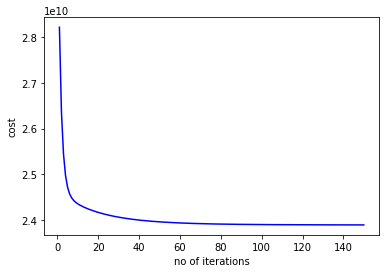

(218593.23477222692, 93681217.32775296)

In [0]:
lr = 0.3
n_iterations = 150
m = X_train.shape[0]

theta = np.random.randn(X_train.shape[1]+1, 1)
cost = np.array([])
std_scaler = StandardScaler()
X_train_bias = std_scaler.fit_transform(X_train_bias)
#print(X_train_bias.dot(theta))

for iteration in range(n_iterations):
    #print(X_train_bias.dot(theta))
    #print(iteration,)
    #y_train.reshape = (-1, 1)
    y_train.values.shape = (y_train.shape[0], 1)
    err = np.subtract(X_train_bias.dot(theta), y_train.values)
    #print(X_train_bias.dot(theta).shape, y_train.shape, err.shape)
    cost = np.append(cost, (1 / (2 * m)) * np.sum(np.square(err)))
    #print("cost:", cost[iteration])
    gradient = (1 / m) * (X_train_bias.T.dot(err))
    #print("gradient:", gradient)
    #print(X_train_bias.T.shape, err.shape, (X_train_bias.T.dot(err)).shape)
    theta = theta - (lr * gradient)
    #print("theta:", theta)
    
plt.plot(np.arange(1, n_iterations + 1), cost, "b-", label="cost function")
plt.xlabel("no of iterations")
plt.ylabel("cost")
plt.show()

y_train_predict = X_train_bias.dot(theta)
y_val_predict = X_val_bias.dot(theta)
#print(y_train.values, y_train_predict)
rmse_error(y_train.values, y_train_predict, y_val.values, y_val_predict)

3. Stochastic Gradient Descent

In [0]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.03)
sgd_reg.fit(X_train_bias, y_train.ravel())

y_train_predict = sgd_reg.predict(X_train_bias)
y_val_predict = sgd_reg.predict(X_val_bias)

rmse_error(y_train.values, y_train_predict, y_val.values, y_val_predict)

(2028073076128049.0, 2043520310561359.2)

4. Ridge Regression

In [0]:
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_train, y_train.ravel())

y_train_predict = ridge_reg.predict(X_train)
y_val_predict = ridge_reg.predict(X_val)

rmse_error(y_train.values, y_train_predict, y_val.values, y_val_predict)

(69262.10914904466, 69052.6120658872)

5. Lasso Regression

In [0]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train.ravel())

y_train_predict = lasso_reg.predict(X_train)
y_val_predict = lasso_reg.predict(X_val)

rmse_error(y_train.values, y_train_predict, y_val.values, y_val_predict)

(69262.10859831468, 69052.38359630929)

6. Elastic Net

In [0]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train.ravel())



(69422.92461676648, 69336.57644675748)

7. Polynomial Features

In [0]:
poly_features = PolynomialFeatures(degree=2, include_bias="False")
X_train_poly = poly_features.fit_transform(X_train)
X_val_poly = poly_features.transform(X_val)

lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train.ravel())

y_train_predict = lin_reg.predict(X_train_poly)
y_val_predict = lin_reg.predict(X_val_poly)

rmse_error(y_train.values, y_train_predict, y_val.values, y_val_predict)

(62911.05336098876, 62825.81707574824)

In [0]:
lin_reg = LinearRegression()
train_model(lin_reg)

In [0]:
rooms_ind, bedrooms_ind, population_ind, households_ind = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ind] / X[:, households_ind]
        population_per_household = X[:, population_ind] / X[:, households_ind]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ind] / X[:, rooms_ind]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

lr_pipeline = Pipeline([
    ('attr_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_extra_attribs = attr_adder.transform(X_train_whole.values)
housing_trans = lr_pipeline.fit_transform(X_train_whole.values)
lin_reg = LinearRegression()
train_model(model=lin_reg, X=housing_trans)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Accuracy: 0.64 +/- 0.01
Time taken: 0.004478931427001953


<h3>Support Vector Machines</h3>

In [0]:
svm_reg = LinearSVR(epsilon=1.5)

<h3>Neural Networks</h3>

In [0]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.complie(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
